# 5003HW7
**Auther: Li,Qichao**

**ID: 20787264**

# Problem 7A

## Part 0 Make preparations

In [1]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
from random import choice,sample,seed
df = pd.read_csv("^HSI-cleaning.csv")

### (a)form the time series of the prices $P(t)$

In [2]:
P = list(df["Adj Close"])
beta = 0.5
M=3
N=101

### (b)generate the transaction price $P_T(t)$

In [3]:
P_T=[P[0]]
for t in range(1,len(P)):
    P_T.append(P[t-1]+beta*(P[t]-P[t-1]))

### (c)initialization

In [4]:
# all_strategies = np.array([[choice([1,-1,0]) for i in range(2**M)] for n in range(2**(2**M))])
# define a function to transfer a number into a strategy: 1(buy),-1(sell)
def num_to_list(n):
    re = []
    for i in range(8):
        re.append(n%2)
        n = n//2
    return re
# create all strategies for all agents:
all_strategies = np.array([num_to_list(i) for i in range(2**8)])
all_strategies[all_strategies<1]=-1
W_s=np.zeros([2**(2**M),len(P)])
for i in range(256):
    W_s[i][0] = 5*P[0]
k_s=np.zeros([2**(2**M),len(P)])

In [5]:
all_strategies

array([[-1, -1, -1, ..., -1, -1, -1],
       [ 1, -1, -1, ..., -1, -1, -1],
       [-1,  1, -1, ..., -1, -1, -1],
       ...,
       [ 1, -1,  1, ...,  1,  1,  1],
       [-1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]])

In [6]:
W_i=np.zeros([N,len(P)])
for i in range(N):
    W_i[i][0] = 5*P[0]
k_i=np.zeros([N,len(P)])
### arrange 2 strategies for each agent randomly
seed(5003)
agent_strategies = np.array([sample([i for i in range(255)],2) for a in range(N)])

In [7]:
###calculate input state at each time
b = []
mu = [0]
for i in range(len(P)-1):
    if P[i+1]>P[i]:
        b_now = 1
    else:
        b_now = 0
    mu_now = (2*mu[-1]+b_now)%8
    mu.append(mu_now)
    b.append(b_now)

## Part A Simulation of the strategies

In [8]:
for t in range(len(P)-1):
    for s in range(len(all_strategies)):
        K = W_s[s][t]/P[t]
        k_s[s][t+1] = max(min(k_s[s][t]+all_strategies[s][mu[t]],K),-K)
        W_s[s][t+1] = W_s[s][t] + k_s[s][t]*(P_T[t+1]-P_T[t])


## Part B Simulation of the agents

In [9]:
for t in range(len(P)-1):
    if t==0:
        for i in range(N):
            K = W_i[i][t]/P[t]
            s_choice = choice([0,1])
            k_i[i][t+1] = max(min(k_i[i][t]+all_strategies[s_choice][mu[t]],K),-K)
            W_i[i][t+1] = W_i[i][t] + k_i[i][t]*(P_T[t+1]-P_T[t])
            continue
    for i in range(N):
        K = W_i[i][t]/P[t]
        Virt = [W_s[s][t] for s in agent_strategies[i]]
        s_choice = agent_strategies[i][Virt.index(max(Virt))]
        k_i[i][t+1] = max(min(k_i[i][t]+all_strategies[s_choice][mu[t]],K),-K)
        W_i[i][t+1] = W_i[i][t] + k_i[i][t]*(P_T[t+1]-P_T[t])

## Part C Presentation of results and discussions

In [10]:
T = [i for i in range(len(P))]

In [11]:
W_s_final = [W_s[s][-1] for s in range(len(all_strategies))]
W_i_final = [W_i[i][-1] for i in range(N)]

### (1) Calculate the best, worst, and average virtual wealth of the strategies at the end of the game. Then calculate the best, worst, and average real wealth of the agents at the end of the game. Here we divide our results by the initial price

In [12]:
Initial_price = 5*P[0]
W_s_max = max(W_s_final)
W_s_min = min(W_s_final)
W_s_ave = np.mean(W_s_final)
print("The best final virtual wealth of the strategies = ",round(W_s_max/Initial_price,3))
print("The worst final virtual wealth of the strategies = ",round(W_s_min/Initial_price,3))
print("The average final virtual wealth of the strategies = ",round(W_s_ave/Initial_price,3))
W_i_max = max(W_i_final)
W_i_min = min(W_i_final)
W_i_ave = np.mean(W_i_final)
print("The best final real wealth of the agents = ",round(W_i_max/Initial_price,3))
print("The worst final real wealth of the agents = ",round(W_i_min/Initial_price,3))
print("The average final real wealth of the agents = ",round(W_i_ave/Initial_price,3))

The best final virtual wealth of the strategies =  23.97
The worst final virtual wealth of the strategies =  0.008
The average final virtual wealth of the strategies =  2.877
The best final real wealth of the agents =  22.964
The worst final real wealth of the agents =  0.029
The average final real wealth of the agents =  3.811


### (2) Find the best 3 and worst 3 strategies and plot a graph of their virtual wealth as a function of time. For comparison, also plot the stock index multiplied by 5.Here we divide our results by the initial price

In [13]:
W_s_max1_index = W_s_final.index(sorted(W_s_final)[-1])
W_s_max2_index = W_s_final.index(sorted(W_s_final)[-2])
W_s_max3_index = W_s_final.index(sorted(W_s_final)[-3])
W_s_min1_index = W_s_final.index(sorted(W_s_final)[0])
W_s_min2_index = W_s_final.index(sorted(W_s_final)[1])
W_s_min3_index = W_s_final.index(sorted(W_s_final)[2])
W_s_max1 = W_s[W_s_max1_index]
W_s_max2 = W_s[W_s_max2_index]
W_s_max3 = W_s[W_s_max3_index]
W_s_min1 = W_s[W_s_min1_index]
W_s_min2 = W_s[W_s_min2_index]
W_s_min3 = W_s[W_s_min3_index]

In [14]:
print(all_strategies[W_s_max1_index])
print(all_strategies[W_s_max2_index])
print(all_strategies[W_s_max3_index])
print(all_strategies[W_s_min1_index])
print(all_strategies[W_s_min2_index])
print(all_strategies[W_s_min3_index])

[ 1  1 -1  1  1 -1 -1  1]
[ 1  1 -1 -1  1 -1  1  1]
[ 1  1 -1  1 -1 -1  1  1]
[-1 -1  1 -1  1 -1 -1 -1]
[-1 -1 -1 -1  1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1]


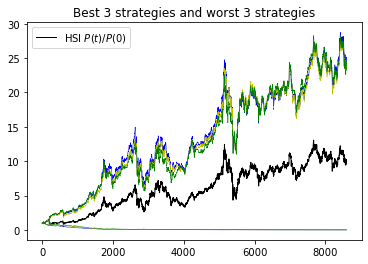

In [15]:
stock_index_5 = 5*np.array(P)
fig,ax = plt.subplots(figsize = (6,4))
ax.plot(T,stock_index_5/Initial_price,'black',lw = 1,label = "HSI $P(t)/P(0)$")
ax.plot(T,W_s_max1/Initial_price,'b',lw = 0.5)
ax.plot(T,W_s_max2/Initial_price,'y',lw = 0.5)
ax.plot(T,W_s_max3/Initial_price,'g',lw = 0.5)
ax.plot(T,W_s_min1/Initial_price,'b',lw = 0.5)
ax.plot(T,W_s_min2/Initial_price,'y',lw = 0.5)
ax.plot(T,W_s_min3/Initial_price,'g',lw = 0.5)
plt.title("Best 3 strategies and worst 3 strategies")
plt.legend()
plt.show()

### (3) Find the best 3 and worst 3 agents and plot a graph of their real wealth as a function of time. We also plot the stock index multiplied by 5 for comparison and divide our results by the initial price

In [16]:
W_i_max1_index = W_i_final.index(sorted(W_i_final)[-1])
W_i_max2_index = W_i_final.index(sorted(W_i_final)[-2])
W_i_max3_index = W_i_final.index(sorted(W_i_final)[-3])
W_i_min1_index = W_i_final.index(sorted(W_i_final)[0])
W_i_min2_index = W_i_final.index(sorted(W_i_final)[1])
W_i_min3_index = W_i_final.index(sorted(W_i_final)[2])
W_i_max1 = W_i[W_i_max1_index]
W_i_max2 = W_i[W_i_max2_index]
W_i_max3 = W_i[W_i_max3_index]
W_i_min1 = W_i[W_i_min1_index]
W_i_min2 = W_i[W_i_min2_index]
W_i_min3 = W_i[W_i_min3_index]

In [17]:
print(all_strategies[W_i_max1_index])
print(all_strategies[W_i_max2_index])
print(all_strategies[W_i_max3_index])
print(all_strategies[W_i_min1_index])
print(all_strategies[W_i_min2_index])
print(all_strategies[W_i_min3_index])

[-1 -1  1 -1  1 -1  1 -1]
[ 1  1 -1  1 -1  1 -1 -1]
[ 1 -1  1 -1 -1  1 -1 -1]
[-1 -1 -1  1 -1 -1 -1 -1]
[ 1  1 -1 -1  1 -1  1 -1]
[ 1 -1 -1 -1 -1  1  1 -1]


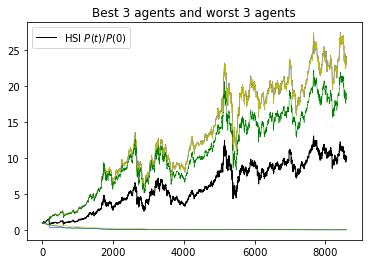

In [18]:
stock_index_5 = 5*np.array(P)
fig,ax = plt.subplots(figsize = (6,4))
ax.plot(T,stock_index_5/Initial_price,'black',lw = 1,label = "HSI $P(t)/P(0)$")
ax.plot(T,W_i_max1/Initial_price,'b',lw = 0.5)
ax.plot(T,W_i_max2/Initial_price,'y',lw = 0.5)
ax.plot(T,W_i_max3/Initial_price,'g',lw = 0.5)
ax.plot(T,W_i_min1/Initial_price,'b',lw = 0.5)
ax.plot(T,W_i_min2/Initial_price,'y',lw = 0.5)
ax.plot(T,W_i_min3/Initial_price,'g',lw = 0.5)
plt.title("Best 3 agents and worst 3 agents")
plt.legend()
plt.show()

### (4) Some obervations

* The best 3 strategies and agents just follow the change of the HSI, meaning that they successuflly predict the future of the stock market and make the right choice, while the worst ones are not so lucky.
* The average wealth of the agents is larger than the initial price, indicating that the wealth of the whole shock market is increasing, which gives the incentives for people to join in the market.
* In this game, no one has the wealth less than 0, meaning that they will quit the market when they almost lose all his/her money.

#### a. Final wealth distribution

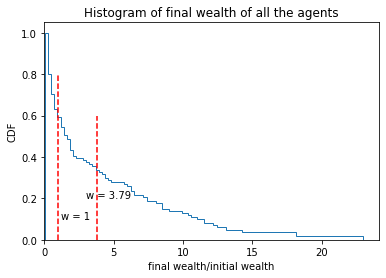

In [19]:
HIS = np.array(W_i_final)/Initial_price
Inflation = 0.04
fig,ax = plt.subplots(figsize = (6,4))
ax.hist(HIS,bins = 100,density = True,cumulative = -1,histtype = 'step')
ax.plot([1,1],[0,0.8],'r--')
ax.plot([(1+Inflation)**34,(1+Inflation)**34],[0,0.6],'r--')
ax.text(1.2,0.1,'w = 1')
ax.text(3,0.2,f'w = {round((1+Inflation)**34,2)}')
ax.set_xlim(0)
ax.set_xlabel("final wealth/initial wealth")
ax.set_ylabel("CDF")
ax.set_title("Histogram of final wealth of all the agents")
plt.show()

* Nearly 60% of the agents gain money from the market without considering the inflation
* Assuming that the inflation is 4% per year, there is still 35% of people who gain money from the market 

#### b. Here we select part of the HSI data which shows the up/down/rugged trend.

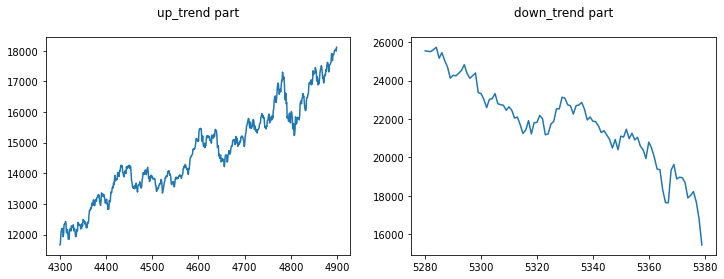

best strategy for up trend: [ 1  1 -1  1  1 -1 -1  1]
best strategy for down trend: [ 1 -1 -1 -1  1  1 -1  1]


In [20]:
fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(T[4300:4900],P[4300:4900])
ax[0].set_title('up_trend part\n')
ax[1].plot(T[5280:5380],P[5280:5380])
ax[1].set_title('down_trend part\n')
plt.show()
up = [i[4900]-i[4300] for i in W_s]
down = [i[5380]-i[5280] for i in W_s]
up_s = all_strategies[up.index(max(up))]
down_s = all_strategies[down.index(max(down))]
print("best strategy for up trend:",up_s)
print("best strategy for down trend:",down_s)

* For both up and down trend, the best strategy seems to be buying when the market have the clear trend in memory and selling when fluctuating.

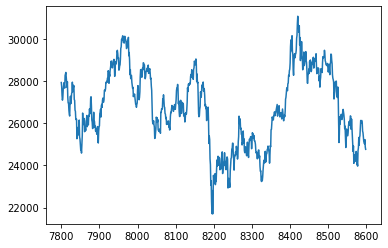

best strategy for rugged trend: [ 1  1 -1 -1  1 -1 -1  1]


In [21]:
fig,ax = plt.subplots(figsize = (6,4))
ax.plot(T[7800:8600],P[7800:8600])
plt.show()
rugged = [i[8598]-i[7800] for i in W_s]
rugged_s = all_strategies[rugged.index(max(rugged))]
print("best strategy for rugged trend:",rugged_s)

* For rugged trend, the best strategy seems to be buying when all the memories are the same and buying in the reversed situation.